# Flights Data Explanatory Presentation
## by Parida 

## Investigation Overview

> In the investigation, we are going to provide insights regarding flights delays. Our main focus will be:
> - Cancellation Reason
> - Day of Week 
> - Distance


## Dataset Overview

> This dataset reports flights in the United States for January 2008, it consists of various columns related to delay and cancellation of flights. Data source link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flights_data = pd.read_csv('2008.csv')

In [3]:
# filter the dataframe for January only
flights_data = flights_data [ flights_data.Month == 1 ]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

# Flights Cancellation Reasons
**Weather and Carrier are the two main reasons for flights cancellations.**
**The 3rd reason is NAS, and no flights cancelled because of security.**

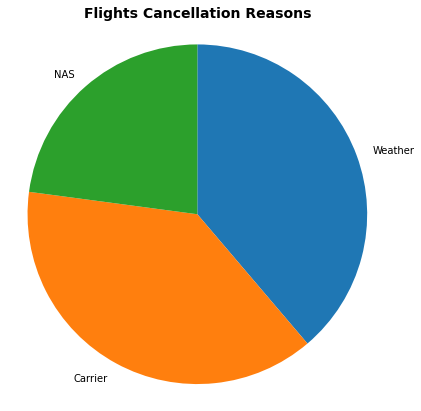

In [5]:
# plot a pie chart
plt.figure(figsize=[10,7])
df = flights_data['CancellationCode'].replace({'A': "Carrier", 'B':"Weather", 'C':"NAS"}, inplace=True)
sorted_counts = flights_data['CancellationCode'].value_counts()

plt.pie(sorted_counts, labels= sorted_counts.index, startangle = 90, counterclock = False);

plt.axis('square');
plt.title('Flights Cancellation Reasons', fontsize=14, weight='bold');

## Flight Delays by Day Of Week

**Interestingly, the weekend days have the least number of flights delay over the workdays. The middle of the week has the most flight delays.**

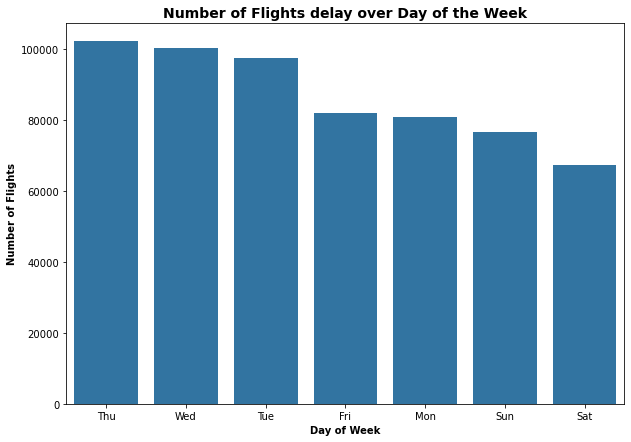

In [6]:
# bar plot 
plt.figure(figsize=[10,7])
base_color= sb.color_palette()[0]
flights_data['DayOfWeek'] = flights_data['DayOfWeek'].replace({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'})
day_counts = flights_data['DayOfWeek'].value_counts()
day_order = day_counts.index
sb.countplot(data=flights_data, x ='DayOfWeek', color=base_color, order=day_order);
;
plt.title('Number of Flights delay over Day of the Week', fontsize=14, weight='bold')
plt.xlabel('Day of Week', weight='bold')
plt.ylabel('Number of Flights', weight='bold');

## Flights Delay by Distance
**With the distance increase, the arrival delays are decrease overall.** 

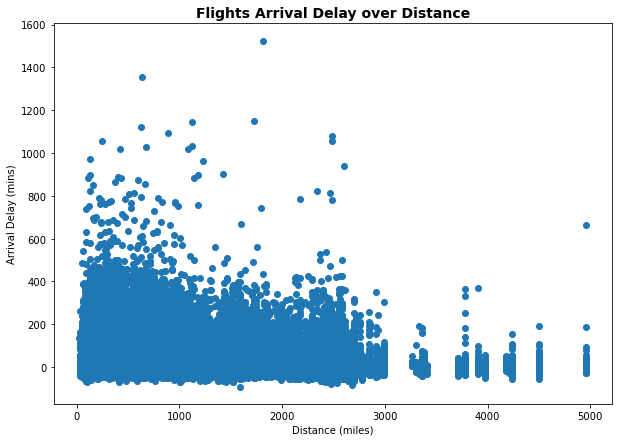

In [7]:
#plot scatter 
plt.figure(figsize=[10,7])
plt.scatter(data= flights_data, x='Distance', y='ArrDelay');

plt.title('Flights Arrival Delay over Distance', fontsize=14, weight='bold')
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (mins)');